# CO2 with Non-EEG features

In [1]:
import pandas as pd

In [2]:
## Lets load the data

full_df = pd.read_pickle("full_df_2021_CO2.pkl")
pd.set_option('display.max_columns', None)

## This the data cleaning. Keeping only the relevant features and removing the less than equal to zero target values

df1= full_df.drop(full_df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,23]], axis=1)

j=[]
for i in range(4,72):
    j.append(i)
df2 = df1.drop(df1.columns[j], axis=1)
df3 = df2.drop(df2.columns[[11,12,13,14,15,16,17,18]], axis=1)
df3
df3.rename(columns={'pda': 'Average Pupil Diameter (mm)', 'pup_dis': 'Pupil Distance (mm)','pd_diff_abs': '|Difference in Pupil Diameter| (mm)', 'ECG.': 'ECG ($\mathrm{\mu V}$)','Resp.': 'Respiration Rate (brpm)','Temp.': 'Skin Temperature ($\mathrm{^o C})$','HR': 'Heart Rate (bpm)','CO2':'$\mathrm{CO_2}$ (ppm)','SpO2':'$\mathrm{SpO_2}$ (%)','GSR':'GSR ($\mathrm{\mu S}$)'}, inplace=True)

j=[]
for i in range(11,331):
    j.append(i)

df4 = df3.drop(df3.columns[j], axis=1)

## Lets change some of variables to standard units

df4['$\mathrm{SpO_2}$ (%)']=df4['$\mathrm{SpO_2}$ (%)']*1000000 ## change the SpO2 to percentage

df4['GSR ($\mathrm{\mu S}$)']=df4['GSR ($\mathrm{\mu S}$)']*1000 ## convert kiloohms to ohms
df4['GSR ($\mathrm{\mu S}$)']=1/df4['GSR ($\mathrm{\mu S}$)']  ## convert ohms to siemans by taking the reciprocal
df4['GSR ($\mathrm{\mu S}$)']=df4['GSR ($\mathrm{\mu S}$)']*1000000 ## convert siemens to microsiemens

df4 = df4.drop(df4.columns[6], axis=1) ## drop the PPG as physical interpration was difficult. Also, it was used to measure SpO2 by the sensor
df4

,$\mathrm{CO_2}$ (ppm),Average Pupil Diameter (mm),Pupil Distance (mm),|Difference in Pupil Diameter| (mm),ECG ($\mathrm{\mu V}$),Respiration Rate (brpm),$\mathrm{SpO_2}$ (%),Heart Rate (bpm),GSR ($\mathrm{\mu S}$),Skin Temperature ($\mathrm{^o C})$
dateTime,,,,,,,,,,
2021-06-09 10:55:43.047,347.151,4.770,65.72,0.00,-0.002129,36.954880,99.0,72.0,0.085379,31.2500
2021-06-09 10:55:44.046,347.386,4.770,65.77,0.04,-0.002145,37.000731,99.0,72.0,0.085404,31.1875
2021-06-09 10:55:45.046,346.418,4.240,65.28,0.48,-0.002531,37.229978,100.0,72.0,0.085379,31.1250
2021-06-09 10:55:53.046,347.109,4.140,65.84,0.22,-0.002252,36.679782,99.0,72.0,0.085276,31.2500
2021-06-09 10:55:54.046,346.136,4.450,65.85,0.22,-0.002217,36.542233,98.0,73.0,0.085250,31.0625
...,...,...,...,...,...,...,...,...,...,...
2021-06-10 11:27:04.678,892.025,2.465,64.57,0.17,-0.001057,27.739085,97.0,124.0,0.092703,29.4375
2021-06-10 11:27:05.673,891.586,2.590,65.62,0.08,-0.000833,27.739085,97.0,124.0,0.093008,29.5000
2021-06-10 11:27:06.678,891.690,2.720,65.93,0.10,-0.000821,28.060032,98.0,124.0,0.092886,29.5625


In [3]:
## Lets create a Train-Test set and transform the data.
## Note that the training set is fit_transformed but test is only transformed

features=df4.drop("$\mathrm{CO_2}$ (ppm)",axis=1)
target=df4["$\mathrm{CO_2}$ (ppm)"].copy()

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features, target, test_size=0.25)



In [4]:
## Lets now train the model using Random Forest Regressor 

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)

## The train prediction
train_prediction_RF=forest_reg.predict(X_train)
RF_mse=mean_squared_error(y_train,train_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_train=RF_rmse

print('The train RMSE for CO2 is:::', '%.2f' % RF_rmse)


The train RMSE for CO2 is::: 7.29


In [5]:
## lets find and plot the feature importance. This method of feature selection is not used in the paper.

feature_importance=forest_reg.feature_importances_
feature_names=['Average Pupil Diameter','Pupil Distance','|Difference in Pupil Diameter|','ECG','Respiration Rate','$\mathrm{SpO_2}$','Heart Rate','GSR','Skin Temperature']


<BarContainer object of 9 artists>

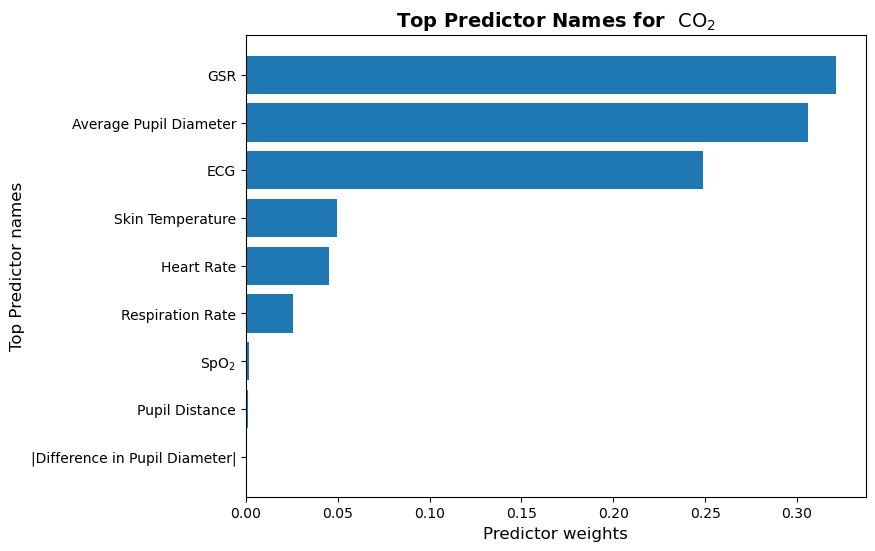

In [6]:
## Lets diplay the scores(or weights) next to the names

feature_list=sorted(zip(feature_importance,feature_names),reverse=True)
feature_list

## Lets extract the top 9 features

scores_ten=[]
names_ten=[]

for i in range(0,9):
    scores_ten.append(feature_list[i][0])
    
for i in range(0,9):
    names_ten.append(feature_list[i][1])
    
## Lets now reverse the list because barh plots in ascending order

scores_rev=[]
names_rev=[]
for i in scores_ten:
    scores_rev.insert(0,i)
    
for i in names_ten:
    names_rev.insert(0,i)
    
## Plot the horizontal graph

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.xlabel("Predictor weights",fontsize=12)
plt.ylabel("Top Predictor names", fontsize=12)
plt.title("Top Predictor Names for  $\mathrm{CO_2}$", fontsize=14,fontweight="bold")

plt.barh(names_rev,scores_rev)


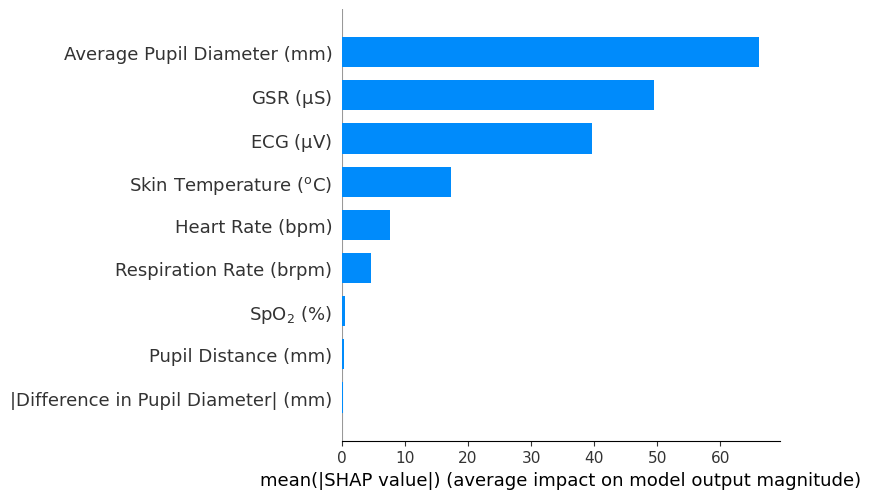

In [7]:
## Lets now use SHAP values for feature importance

import shap

shap_values = shap.TreeExplainer(forest_reg).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=9)




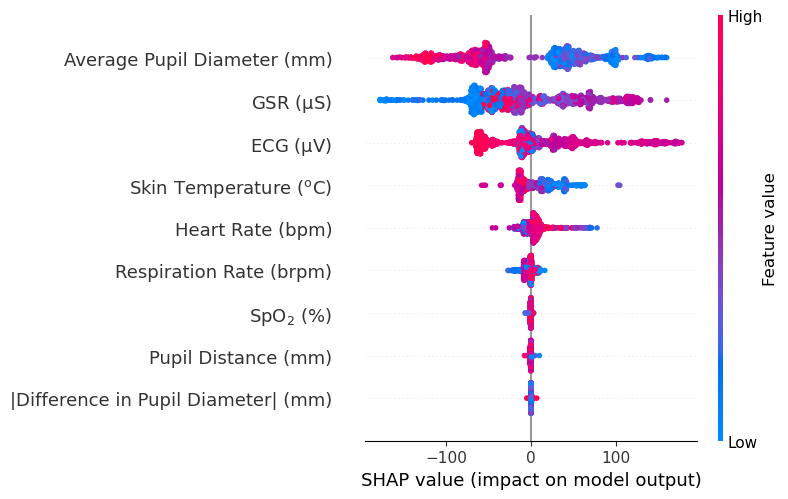

In [8]:
shap.summary_plot(shap_values, X_train,max_display=9)


In [9]:
## lets get the top 9 features as selected by SHAP values

shap_names=X_train.columns[np.argsort(np.abs(shap_values).mean(0))]  ## gives entire names in ascending order

## lets reverse the list of the names
shap_descending=[]
for i in reversed(shap_names):
    shap_descending.append(i)

## lets get the top 9 features as selected by SHAP values
    
names_rev_shap=[]
for i in range(0,9):
    names_rev_shap.append(shap_descending[i])
    
names_rev_shap


['Average Pupil Diameter (mm)',
 'GSR ($\\mathrm{\\mu S}$)',
 'ECG ($\\mathrm{\\mu V}$)',
 'Skin Temperature ($\\mathrm{^o C})$',
 'Heart Rate (bpm)',
 'Respiration Rate (brpm)',
 '$\\mathrm{SpO_2}$ (%)',
 'Pupil Distance (mm)',
 '|Difference in Pupil Diameter| (mm)']

In [10]:
## Now that we have the list of top 10 features, lets plot the correlation plot

names_rev_shap.append('$\mathrm{CO_2}$ (ppm)') ## add the target CO2 for the correlation matrix
corr=df4[names_rev_shap].corr()
corr


,Average Pupil Diameter (mm),GSR ($\mathrm{\mu S}$),ECG ($\mathrm{\mu V}$),Skin Temperature ($\mathrm{^o C})$,Heart Rate (bpm),Respiration Rate (brpm),$\mathrm{SpO_2}$ (%),Pupil Distance (mm),|Difference in Pupil Diameter| (mm),$\mathrm{CO_2}$ (ppm)
Average Pupil Diameter (mm),1.000000,-0.603587,-0.588840,0.142125,-0.482430,0.370669,-0.029129,0.106420,-0.117322,-0.562625
GSR ($\mathrm{\mu S}$),-0.603587,1.000000,0.669179,0.528085,0.047780,-0.045044,0.147905,-0.011860,0.019730,0.196144
ECG ($\mathrm{\mu V}$),-0.588840,0.669179,1.000000,0.040953,0.225279,-0.305920,-0.043644,0.028404,0.067011,0.210840
Skin Temperature ($\mathrm{^o C})$,0.142125,0.528085,0.040953,1.000000,-0.493415,0.531540,0.314694,-0.006126,-0.001963,-0.389064
Heart Rate (bpm),-0.482430,0.047780,0.225279,-0.493415,1.000000,-0.230689,-0.017860,-0.099888,0.060948,0.292842
Respiration Rate (brpm),0.370669,-0.045044,-0.305920,0.531540,-0.230689,1.000000,0.537358,-0.018387,0.004088,-0.432078
$\mathrm{SpO_2}$ (%),-0.029129,0.147905,-0.043644,0.314694,-0.017860,0.537358,1.000000,-0.068459,0.030793,-0.182879
Pupil Distance (mm),0.106420,-0.011860,0.028404,-0.006126,-0.099888,-0.018387,-0.068459,1.000000,-0.234868,-0.042022
|Difference in Pupil Diameter| (mm),-0.117322,0.019730,0.067011,-0.001963,0.060948,0.004088,0.030793,-0.234868,1.000000,-0.044706
$\mathrm{CO_2}$ (ppm),-0.562625,0.196144,0.210840,-0.389064,0.292842,-0.432078,-0.182879,-0.042022,-0.044706,1.000000


Text(0.5, 1.0, "Pearson's Correlation Coefficient Plot")

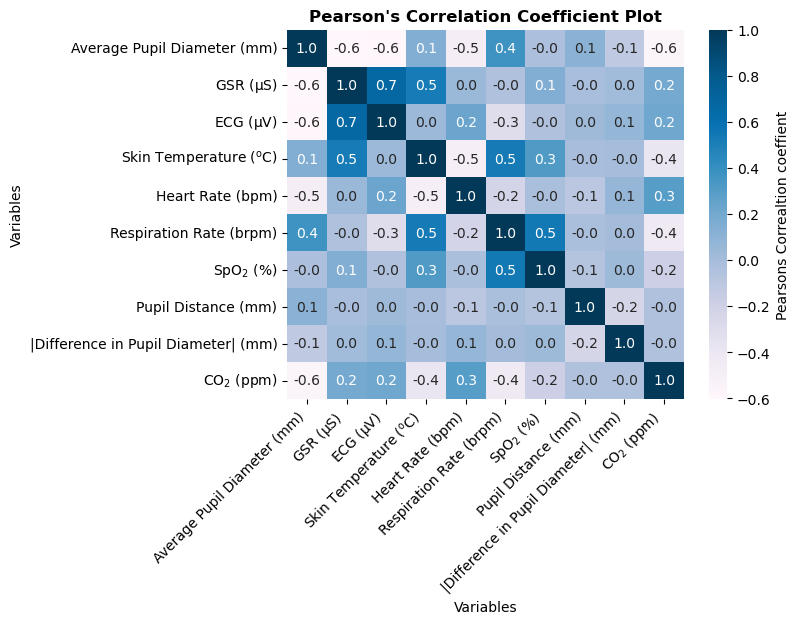

In [11]:
import seaborn as sns


ax=sns.heatmap(corr,cmap="PuBu",annot=True,fmt=".1f",cbar_kws={'label': 'Pearsons Correaltion coeffient'})

plt.xticks(rotation=45,horizontalalignment='right')

ax.set(xlabel="Variables",ylabel="Variables")

plt.title("Pearson's Correlation Coefficient Plot",fontweight='bold')

In [12]:
## Now lets plot the mutual information

from sklearn.feature_selection import mutual_info_regression

## Lets calucalute the mutual information against each of the top 10 features

mf_mat=[]
for i in range(0,10):
    for j in range(0,10):
        dd=df4[names_rev_shap[i]]
        mm=df4[names_rev_shap[j]]

        kk=dd.to_numpy().reshape((-1,1))
        
        vv=mm.to_numpy().reshape((-1,1))
        pp=vv.reshape(2317,)             ## reshape the array to (2317,) as required by the mutual_in
        
        mi=mutual_info_regression(kk,pp)
        mf_mat.append(mi)

mf_mat_arr=np.asarray(mf_mat)  ## transform the elements from a list to array

# reshape array into 10 rows x10 columns

reshaped_array = mf_mat_arr.reshape(10, 10).T 


In [13]:
mf_df=pd.DataFrame(reshaped_array,columns=[names_rev_shap],index=[names_rev_shap]) ## convert into a pandas DataFrame
mf_df


,Average Pupil Diameter (mm),GSR ($\mathrm{\mu S}$),ECG ($\mathrm{\mu V}$),Skin Temperature ($\mathrm{^o C})$,Heart Rate (bpm),Respiration Rate (brpm),$\mathrm{SpO_2}$ (%),Pupil Distance (mm),|Difference in Pupil Diameter| (mm),$\mathrm{CO_2}$ (ppm)
Average Pupil Diameter (mm),5.846703,0.570804,0.519254,0.332306,0.278578,0.352258,0.051632,0.003737,0.004952,0.600219
GSR ($\mathrm{\mu S}$),0.572335,6.129144,1.407959,1.323143,1.173669,0.793398,0.205752,0.018596,0.020397,2.509076
ECG ($\mathrm{\mu V}$),0.518122,1.407342,6.472489,1.079766,0.737419,0.802589,0.266969,0.056227,0.018498,1.495979
Skin Temperature ($\mathrm{^o C})$,0.334140,1.318091,1.082106,3.651654,0.699273,0.663978,0.117712,0.040321,0.000000,1.683830
Heart Rate (bpm),0.276566,1.173819,0.735812,0.692177,3.539821,0.543055,0.099389,0.026252,0.004726,1.610934
Respiration Rate (brpm),0.356130,0.797759,0.796099,0.676162,0.554836,5.149553,0.373498,0.017190,0.000000,0.850813
$\mathrm{SpO_2}$ (%),0.040507,0.207811,0.266809,0.130207,0.118234,0.365578,1.747393,0.000000,0.000000,0.278680
Pupil Distance (mm),0.008684,0.024412,0.052569,0.037645,0.022817,0.015884,0.000102,5.158175,0.046626,0.029140
|Difference in Pupil Diameter| (mm),0.012937,0.024382,0.020662,0.000000,0.028613,0.000000,0.000000,0.053232,3.548939,0.023550
$\mathrm{CO_2}$ (ppm),0.599037,2.511186,1.496399,1.683749,1.607074,0.851404,0.278507,0.025584,0.026813,6.489141


Text(0.5, 1.0, 'Mutual Information Plot')

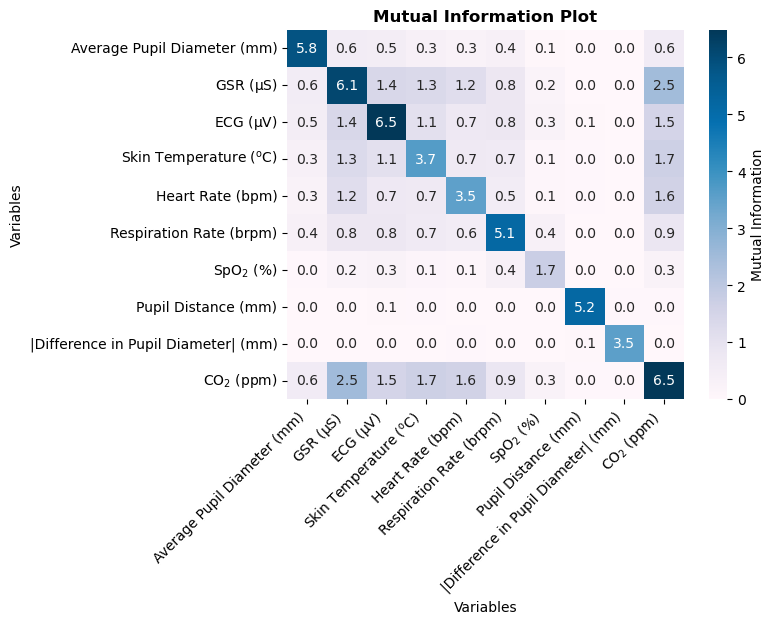

In [14]:
ax=sns.heatmap(mf_df,cmap="PuBu",annot=True,fmt='.1f',cbar_kws={'label':'Mutual Information'}) ## Now lets plot the mutual information heatmap

plt.xticks(rotation=45,horizontalalignment='right')

ax.set(title="Mutual Information Plot",xlabel="Variables",ylabel="Variables")

plt.title("Mutual Information Plot",fontweight='bold')

In [15]:
## The test prediction

test_prediction_RF=forest_reg.predict(X_test)
RF_mse=mean_squared_error(y_test,test_prediction_RF)
RF_rmse=np.sqrt(RF_mse)
RF_rmse_test=RF_rmse

print('The test RMSE for CO2 is:::', '%.2f' % RF_rmse)

## Lets now use the 6 fold cross-validation

#from sklearn.model_selection import cross_val_score
#scores=cross_val_score(forest_reg,X_train_scaled,y_train,scoring="neg_mean_squared_error",cv=6)
#RF_rmse_scores=np.sqrt(-scores)
#RF_rmse_scores
#RF_rmse=RF_rmse_scores.mean()

#cv_rmse_NO2=RF_rmse_scores.mean()

#print('The cross-validation RMSE for XO2 is:::', '%.2f' % cv_rmse_NO2)

The test RMSE for CO2 is::: 31.65


In [16]:
### The correlation values

from scipy.stats import pearsonr

## The train correlation
train_r_sq=pearsonr(y_train,train_prediction_RF)[0]

correlation_train=int(train_r_sq*100)/100 ## display only two digits without rounding
print(correlation_train)

## The test correlation
test_r_sq=pearsonr(y_test,test_prediction_RF)[0]
correlation_test=int(test_r_sq*100)/100 ## display only two digits without rounding
print(correlation_test)

0.99
0.97


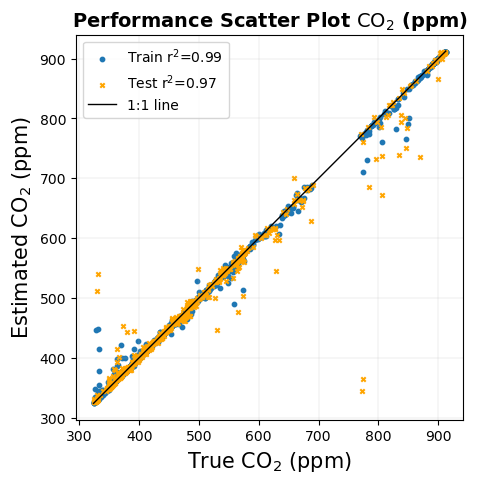

In [17]:
## Lets plot the scatter plot

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.default']='regular'


plt.figure(figsize=(5,5))
plt.scatter(y_train, train_prediction_RF,s=10,c='C0',label="Train $r^2$={}".format(correlation_train))
plt.scatter(y_test, test_prediction_RF,marker='x',s=10,c='orange',label='Test $r^2$={}'.format(correlation_test))


p1 = max(max(train_prediction_RF), max(y_train))
p2 = min(min(train_prediction_RF), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black',label='1:1 line',linewidth=1)
plt.xlabel('True $\mathrm{CO_2}$ (ppm)', fontsize=15)
plt.ylabel('Estimated $\mathrm{CO_2}$ (ppm)', fontsize=15)
plt.axis('equal')
plt.title("Performance Scatter Plot $\mathrm{CO_2}$ (ppm)", fontsize=14,fontweight="bold")
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()

In [18]:
## Lets plot the quantile quantile 
## An easy way to plot the QQ plots but less customization
#from statsmodels.graphics.gofplots import qqplot_2samples

all_preds=np.concatenate((train_prediction_RF,test_prediction_RF)) ## the list of all predictions and target values
preds=np.sort(all_preds)
tars=target.sort_values()

#qqplot_2samples(tars,preds,line='45',xlabel='Quantiles of True $\mathrm{NO_2}$',ylabel='Quantiles of Estimated $\mathrm{NO_2}$')
#plt. title('Quantile Quantile plot of $\mathrm{NO_2}$ ',fontsize=14,fontweight="bold")
#plt.grid(axis='both',linewidth=0.15)
#plt.show()

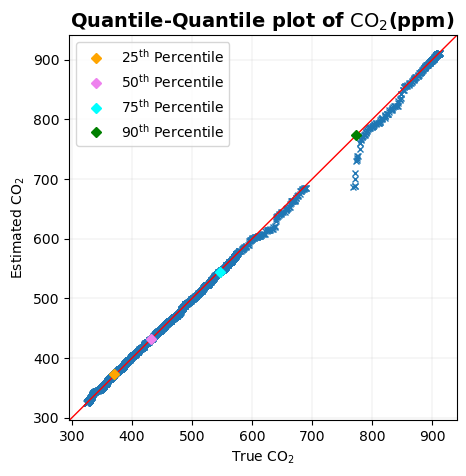

In [19]:
## Source https://stackoverflow.com/questions/35878552/how-to-change-plot-properties-of-statsmodels-qqplot-python
## Source https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.ProbPlot.html

## This helps in customizing the graph
import statsmodels.api as sm
import scipy.stats as stats

plt.rc("figure", figsize=(5,5)) ## to make same figure size in statsmodels.api


pp_x = sm.ProbPlot(preds, fit=False)
pp_y = sm.ProbPlot(tars, fit=False)
qq = pp_x.qqplot(xlabel='True $\mathrm{CO_2}$',ylabel='Estimated $\mathrm{CO_2}$',marker='x',markersize=4,other=pp_y)

sm.qqline(qq.axes[0], line='45', fmt='r',linewidth=1)
                                 
tars_25=np.percentile(tars,25)  ## for the percentiles                                                        
tars_50=np.percentile(tars,50)
tars_75=np.percentile(tars,75)
tars_90=np.percentile(tars,90)


preds_25=np.percentile(preds,25)
preds_50=np.percentile(preds,50)
preds_75=np.percentile(preds,75)  
preds_90=np.percentile(tars,90)  ## end of percentiles

plt.plot(tars_25,preds_25,marker="D",markersize=5,color="orange",linestyle ='None',label="$\mathrm{25^{th}}$ Percentile")
plt.plot(tars_50,preds_50,marker="D",markersize=5,color="violet",linestyle ='None',label="$\mathrm{50^{th}}$ Percentile")
plt.plot(tars_75,preds_75,marker="D",markersize=5,color="Cyan",linestyle ='None',label="$\mathrm{75^{th}}$ Percentile")
plt.plot(tars_90,preds_90,marker="D",markersize=5,color="Green",linestyle ='None',label="$\mathrm{90^{th}}$ Percentile")


plt.grid(axis='both',linewidth=0.15)

plt. title('Quantile-Quantile plot of $\mathrm{CO_2}$(ppm) ',fontsize=14,fontweight="bold")

plt.legend()
plt.show()


## Note that since the number of samples is the same, sorting the values in ascending or descending order and then...
## plotting a scatter plot will also do the same thing as the quantiles are located in same point for distribution..
## of same size.

In [20]:
## Lets now plot the Time series plot. 

## Note that using the train_test_split function shuffles the data. so first the y_train and y_test has to be....
#concatenated. Dont use the "target" variable because the predicted values-train_prediction and train_prediction are not in
## in a timestamp but in an array.

splitted_original_data=pd.concat([y_train,y_test]) ## concatenate the splitted original target variable i.e. CO_2
splitted_original_data

predicted_splited=np.concatenate((train_prediction_RF,test_prediction_RF),axis=None) ## concatenate the predicted....
predicted_splited ## train and test numpy arrays

splitted_df=splitted_original_data.to_frame() ##convert splitted original data CO2 from pandas series to 
splitted_df   

splitted_df['predicted_splited']=predicted_splited.tolist() ## Now concatenate the CO2 dataframe and the
splitted_df                                                         ## the numpy array

sorted_df=splitted_df.sort_values(by='dateTime') ## sort according to timestamp
sorted_df     

df_reset=sorted_df.reset_index() ##reset the index and start from zero as the hh:mm:ss is not real time
df_reset 

df_indexed=df_reset.drop(columns="dateTime") 
df_indexed 

df_timeseries=df_indexed.rename(columns={'CO2':'True $\mathrm{CO_2}$','predicted_splited':'Estimated $\mathrm{CO_2}$'})
 



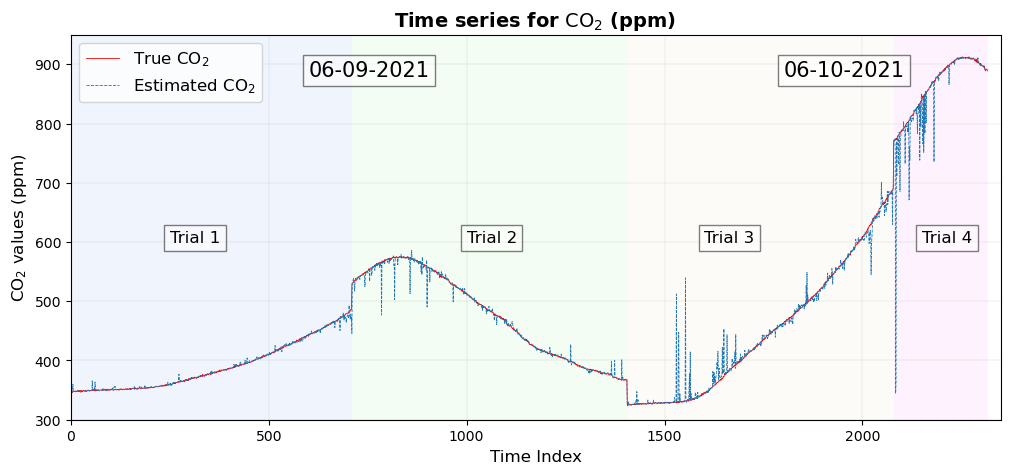

In [21]:
##Lets now plot the time series

# An alternative way go plot:: ax=df_timeseries.plot(figsize=(12, 6), fontsize=15,linewidth=0.6,linestyle='-')

## sorurce of code below https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
import matplotlib.patches as patches


fig, ax = plt.subplots(figsize=(12,5))

ax.plot(df_timeseries['$\mathrm{CO_2}$ (ppm)'],label='True $\mathrm{CO_2}$',linewidth=0.6,color='red')
ax.plot(df_timeseries['Estimated $\mathrm{CO_2}$'],label='Estimated $\mathrm{CO_2}$',linewidth=0.6,linestyle='--')

plt.text(600,880, '06-09-2021', fontsize = 15, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1800,880, '06-10-2021', fontsize = 15, 
         bbox = dict(facecolor = 'white', alpha = 0.5))


plt.text(250,600, 'Trial 1', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1000,600, 'Trial 2', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1600,600, 'Trial 3', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(2150,600, 'Trial 4', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

rect1 = patches.Rectangle((0, 300), 710, 650, fc="CornflowerBlue",alpha=0.1)
ax.add_patch(rect1)

rect2 = patches.Rectangle((711, 300), 696, 650, fc="lightgreen",alpha=0.1)
ax.add_patch(rect2)

rect3 = patches.Rectangle((1407, 300), 673, 650, fc="wheat",alpha=0.1)
ax.add_patch(rect3)

rect4 = patches.Rectangle((2080, 300), 238, 650, fc="violet",alpha=0.1)
ax.add_patch(rect4)

plt.xlim([0,2350])
plt.ylim([300,950])


plt.xlabel('Time Index', fontsize=12)
plt.ylabel('$\mathrm{CO_2}$ values (ppm)',fontsize=12)
plt.title('Time series for $\mathrm{CO_2}$ (ppm) ',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()

In [22]:
## lets now extract rows from the timeseries so that there is discontinuity in the trials, as the red lines seen are...
## continous

timeseries_1=df_timeseries.iloc[0:709,:]
timeseries_2=df_timeseries.iloc[710:1405,:]
timeseries_3=df_timeseries.iloc[1406:2078,:]
timeseries_4=df_timeseries.iloc[2079:2316,:]

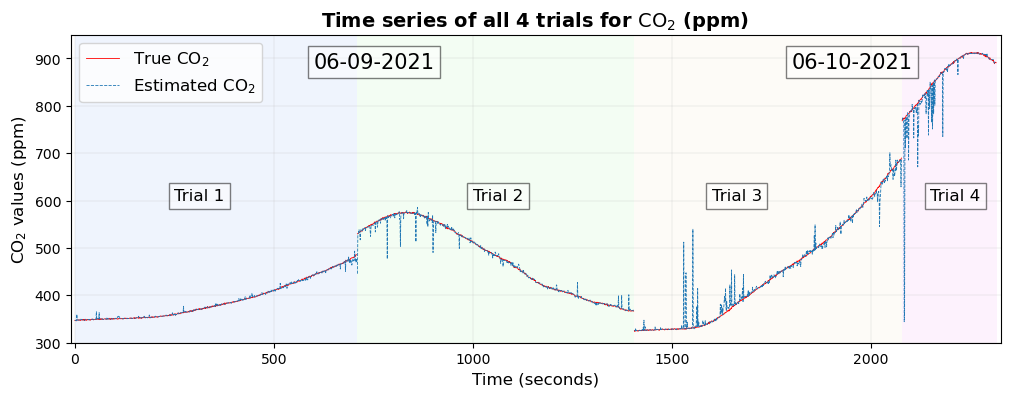

In [23]:
fig, ax = plt.subplots(figsize=(12,4))


#plt.axvline(x = 1405, color='orange',linewidth=0.8,linestyle='--')


ax.plot(timeseries_1['$\mathrm{CO_2}$ (ppm)'],label='True $\mathrm{CO_2}$',linewidth=0.6,color='red')
ax.plot(timeseries_1['Estimated $\mathrm{CO_2}$'],label='Estimated $\mathrm{CO_2}$',linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_2['$\mathrm{CO_2}$ (ppm)'],linewidth=0.6,color='red')
ax.plot(timeseries_2['Estimated $\mathrm{CO_2}$'],linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_3['$\mathrm{CO_2}$ (ppm)'],linewidth=0.6,color='red')
ax.plot(timeseries_3['Estimated $\mathrm{CO_2}$'],linewidth=0.6,linestyle='--',color='C0')

ax.plot(timeseries_4['$\mathrm{CO_2}$ (ppm)'],linewidth=0.6,color='red')
ax.plot(timeseries_4['Estimated $\mathrm{CO_2}$'],linewidth=0.6,linestyle='--',color='C0')


plt.text(600,880, '06-09-2021', fontsize = 15, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1800,880, '06-10-2021', fontsize = 15, 
         bbox = dict(facecolor = 'white', alpha = 0.5))


plt.text(250,600, 'Trial 1', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1000,600, 'Trial 2', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(1600,600, 'Trial 3', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.text(2150,600, 'Trial 4', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

rect1 = patches.Rectangle((0, 300), 709, 650, fc="CornflowerBlue",alpha=0.1)
ax.add_patch(rect1)

rect2 = patches.Rectangle((710, 300), 695, 650, fc="lightgreen",alpha=0.1)
ax.add_patch(rect2)

rect3 = patches.Rectangle((1406, 300), 672, 650, fc="wheat",alpha=0.1)
ax.add_patch(rect3)

rect4 = patches.Rectangle((2079, 300), 237, 650, fc="violet",alpha=0.1)
ax.add_patch(rect4)

plt.xlim([-10,2327])
plt.ylim([300,950])


plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('$\mathrm{CO_2}$ values (ppm)',fontsize=12)
plt.title('Time series of all 4 trials for $\mathrm{CO_2}$ (ppm) ',fontsize=14,fontweight="bold")
plt.legend(fontsize=12)
plt.grid(axis='both',linewidth=0.15)
plt.show()

# Bar Plot for r^2

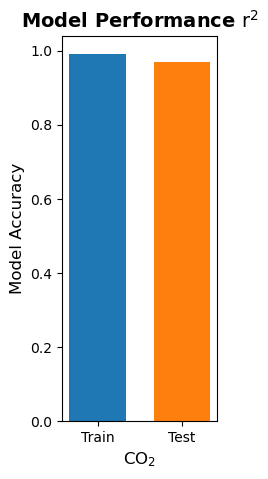

In [24]:
vals=[correlation_train,correlation_test]
bars=["Train",'Test']

x_pos=[0,0.3]

plt.figure(figsize=(2, 5))

plt.bar(x_pos,vals,width=0.2,color=["tab:blue","tab:orange"])

plt.xticks(x_pos, bars)

plt.xlabel("$\mathrm{CO_2}$",fontsize=12)
plt.ylabel("Model Accuracy", fontsize=12)

plt.title("Model Performance $\mathrm{r^2}$", fontsize=14,fontweight="bold")
plt.show()

plt.show()

# Bar plot for RMSE

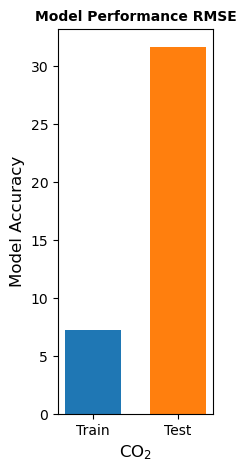

In [25]:
vals=[RF_rmse_train,RF_rmse_test]
bars=["Train",'Test']

x_pos=[0,0.3]

plt.figure(figsize=(2, 5))

plt.bar(x_pos,vals,width=0.2,color=["tab:blue","tab:orange"])

plt.xticks(x_pos, bars)

plt.xlabel("$\mathrm{CO_2}$",fontsize=12)
plt.ylabel("Model Accuracy", fontsize=12)

plt.title("Model Performance RMSE", fontsize=10,fontweight="bold")
plt.show()

plt.show()
